# Convolutional Neural Network for Binary Classification

## Prepare Images Data Folders for ImageDataGenerator

In [1]:
import os
import shutil
from shutil import copyfile

In [3]:
base_dir = 'PetImages'

source_path_dogs = os.path.join(base_dir, 'Dog')
source_path_cats = os.path.join(base_dir, 'Cat')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 1501 images of dogs.
There are 1501 images of cats.


Download the Data Set:
https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [6]:
# Define root directory
root_dir = '/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets
    Args:
    root_path (string) - the base directory path to create subdirectories from
    Returns:
    None
    """
    # Make main dir folder
    os.mkdir(f'{root_path}')

    # Train and Val dir
    train_dir = os.path.join(root_path, 'training')
    val_dir = os.path.join(root_path, 'validation')
    os.mkdir(f'{train_dir}')
    os.mkdir(f'{val_dir}')

    # Cats and Dogs dir
    train_dir_cats = os.path.join(train_dir, 'cats')
    train_dir_dogs = os.path.join(train_dir, 'dogs')
    val_dir_cats = os.path.join(val_dir, 'cats')
    val_dir_dogs = os.path.join(val_dir, 'dogs')

    # Make val and train folder
    os.mkdir(f'{train_dir_cats}')
    os.mkdir(f'{train_dir_dogs}')
    os.mkdir(f'{val_dir_cats}')
    os.mkdir(f'{val_dir_dogs}')

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("_")

In [7]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\training
/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\validation
/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\training\cats
/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\training\dogs
/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\validation\cats
/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs\validation\dogs


In [8]:
import random

In [9]:
def split_data(source_dir, training_dir, validation_dir, split_size):
    """
    Splits the data into train and test sets
    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    Returns:
    None
    """
    # List of all files with length =! 0
    files = []
    for file_name in os.listdir(source_dir):
        path = os.path.join(source_dir, f'{file_name}')
        if os.path.getsize(path) == 0:
            print(f'{file_name} is zero length, so ignoring.')
            pass
        else:
            files.append(file_name)

    shuffle_files = random.sample(files, len(files))
    train_files = shuffle_files[:int(len(files)*split_size)]
    val_files = shuffle_files[int(len(files)*split_size):]

    # Training set
    for file_name in train_files:
        copyfile(os.path.join(source_dir, f'{file_name}'), os.path.join(training_dir, f'{file_name}'))

    # Validation set
    for file_name in val_files:
        copyfile(os.path.join(source_dir, f'{file_name}'), os.path.join(validation_dir, f'{file_name}'))

In [10]:
CAT_SOURCE_DIR = "C:/Users/enzof/PycharmProjects/TFExamTest/CNN/PetImages/Cat"
DOG_SOURCE_DIR = "C:/Users/enzof/PycharmProjects/TFExamTest/CNN/PetImages/Dog/"
TRAINING_DIR = "C:/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs/training/"
VALIDATION_DIR = "C:/Users/enzof/PycharmProjects/TFExamTest/CNN/cats-v-dogs/validation/"
TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")
TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")
SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, SPLIT_SIZE)

cat.000.jpg is zero length, so ignoring.
dog.000.jpg is zero length, so ignoring.


In [11]:
print(f"Original cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

Original cat's directory has 1501 images
Original dog's directory has 1501 images

There are 1350 images of cats for training
There are 1350 images of dogs for training
There are 150 images of cats for validation
There are 150 images of dogs for validation


Shape: (350, 499, 3)


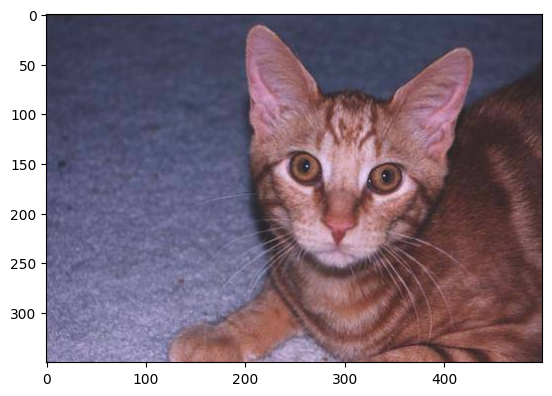

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

plt.imshow(load_img(f"{os.path.join(TRAINING_CATS_DIR, os.listdir(TRAINING_CATS_DIR)[10])}"))
sample_image  = load_img(f"{os.path.join(TRAINING_CATS_DIR, os.listdir(TRAINING_CATS_DIR)[10])}")
sample_array = img_to_array(sample_image)
print(f"Shape: {sample_array.shape}")

## ImageDataGenerator: Batches of tensor image data with real-time data augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(training_dir, validation_dir):
    """
    Creates the training and validation data generators
    Args:
    training_dir (string): directory path containing the training images
    validation_dir (string): directory path containing the testing/validation images
    Returns:
    train_generator, validation_generator - tuple containing the generators
    """
    # Instantiate the ImageDataGenerator class
    train_datagen = ImageDataGenerator(rescale=1/255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    # train_datagen.flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=10,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

    # Instantiate the ImageDataGenerator class
    validation_datagen = ImageDataGenerator(rescale=1/255)

    # flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=10,
                                                                  class_mode='binary',
                                                                  target_size=(150, 150))
    return train_generator, validation_generator

In [14]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [15]:
images, labels = next(train_generator)
print('batch size =', len(labels), labels)

batch size = 10 [1. 1. 0. 1. 1. 0. 1. 0. 1. 1.]


## Callback

In [16]:
import tensorflow as tf

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

## Model

In [17]:
from tensorflow.keras.optimizers import RMSprop

def create_model():
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [18]:
# Instantiate the callback
callbacks = MyCallback()

# Instantiate the model
model = create_model()

# Model summary
model.summary()

# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

## Visualizing Intermediate Representation


In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def kernel_representation(training_dir1, training_dir2, model):

    train_cat_file_names = os.listdir(training_dir1)
    train_dog_file_names = os.listdir(training_dir2)

    # Define a new Model that will take an image as input, and will output
    # intermediate representations for all layers in the previous model
    successive_outputs = [layer.output for layer in model.layers]
    visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

    # Prepare a random input image from the training set.
    cat_img_files = [os.path.join(training_dir1, f) for f in train_cat_file_names]
    dog_img_files = [os.path.join(training_dir2, f) for f in train_dog_file_names]
    img_path = random.choice(cat_img_files + dog_img_files)
    img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
    x = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
    x = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)
    # Scale by 1/255
    x /= 255

    # Run the image through the network, thus obtaining all
    # intermediate representations for this image.
    successive_feature_maps = visualization_model.predict(x)

    # These are the names of the layers, so you can have them as part of our plot
    layer_names = [layer.name for layer in model.layers]

    # Display the representations
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:
            #-------------------------------------------
            # Just do this for the conv / maxpool layers, not the fully-connected layers
            #-------------------------------------------
            n_features = feature_map.shape[-1]  # number of features in the feature map
            size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

            # Tile the images in this matrix
            display_grid = np.zeros((size, size * n_features))

            #-------------------------------------------------
            # Postprocess the feature to be visually palatable
            #-------------------------------------------------
            for i in range(n_features):
                x  = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std ()
                x *=  64
                x += 128
                x  = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i*size : (i+1)*size] = x # Tile each filter into a horizontal grid

            #-----------------
            # Display the grid
            #-----------------
            scale = 20. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto', cmap='viridis' )

1/1 [==============================] - 0s 145ms/step


C:\Users\enzof\AppData\Local\Temp\ipykernel_9596\239076034.py:51: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


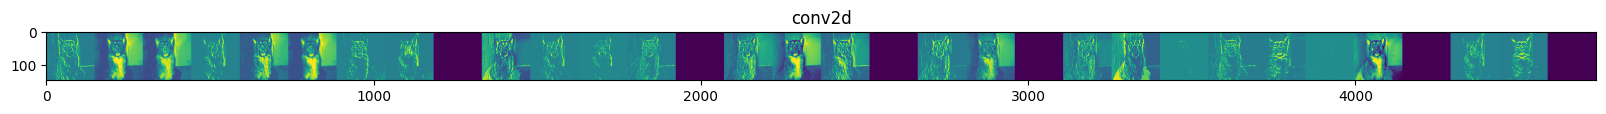

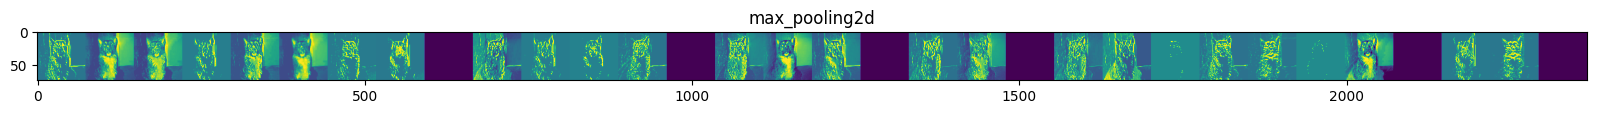

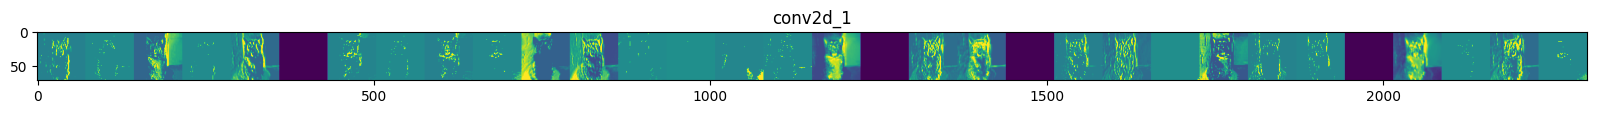

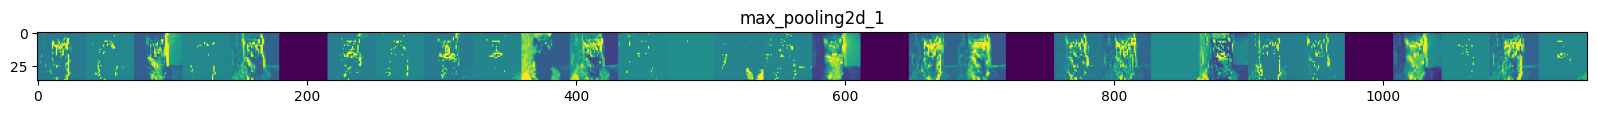

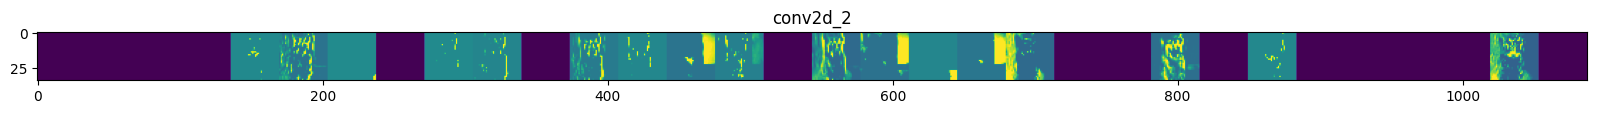

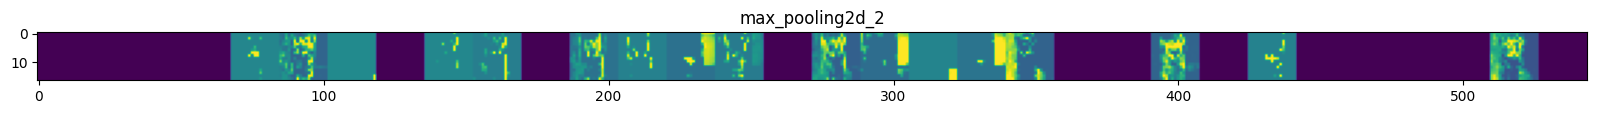

In [20]:
kernel_representation(TRAINING_CATS_DIR, TRAINING_DOGS_DIR, model)


## Accuracy and Loss

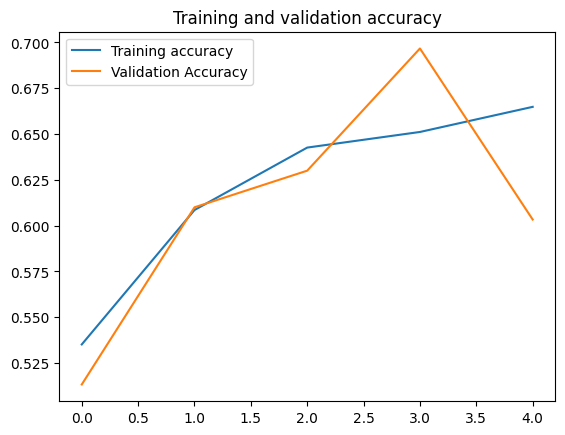

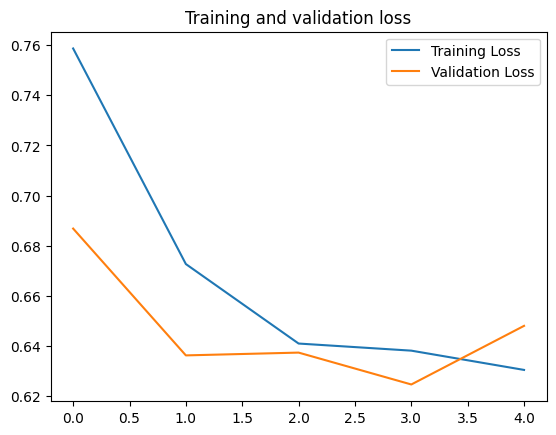

In [21]:
def plot_acc_val(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss' ]
    epochs = range(len(acc)) # Get number of epochs

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_acc_val(history)

## Model training history

In [22]:
def download_history():
    import pickle
    with open('model_history.pkl', 'wb') as f:
        pickle.dump(history.history, f)
download_history()
path = "/Users/enzof/PycharmProjects/TFExamTest/CNN"

for file_name in os.listdir(path):
    if file_name == 'model_history.pkl':
        print(f'{file_name} file size is {os.path.getsize(file_name)} bytes')

model_history.pkl file size is 256 bytes


## Predict results

1/1 [==============================] - 0s 122ms/step
[0.9569626]
Dog


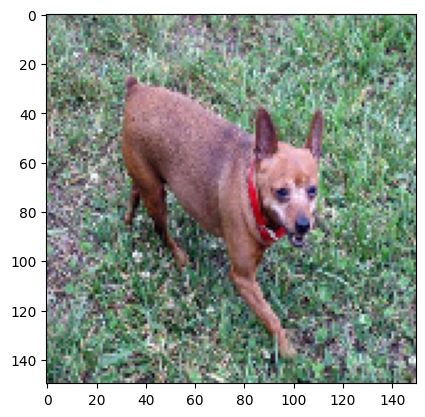

In [23]:
# File names
train_cat_file_names = os.listdir(VALIDATION_CATS_DIR)
train_dog_file_names = os.listdir(VALIDATION_DOGS_DIR)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(VALIDATION_CATS_DIR, f) for f in train_cat_file_names]
dog_img_files = [os.path.join(VALIDATION_DOGS_DIR, f) for f in train_dog_file_names]
path = random.choice(cat_img_files + dog_img_files)

# Scale de Image data for predictions
img=load_img(path, target_size=(150, 150))
x = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)
x /= 255
classes = model.predict(x, batch_size=10)

# Plot the Image and print the predicted Class
plt.imshow(img)
print(classes[0])
if classes[0] > .5:
    print("Dog")
else:
    print("Cat")